In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster

In [2]:
import matplotlib as mpl
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus']= False
path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname = path, size = 50).get_name()
plt.rc('font', family=font_name)

In [14]:
df = pd.read_excel('D:\\BigData\\project\\High_school\\data\\진짜최종.xlsx',index_col=0)   # 학원수 / 매매가

In [15]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   자치구       25 non-null     object
 1   2013사업체수  25 non-null     int64 
 2   2013종사자수  25 non-null     int64 
 3   2014사업체수  25 non-null     int64 
 4   2014종사자수  25 non-null     int64 
 5   2015사업체수  25 non-null     int64 
 6   2015종사자수  25 non-null     int64 
 7   2016사업체수  25 non-null     int64 
 8   2016종사자수  25 non-null     int64 
 9   2017사업체수  25 non-null     int64 
 10  2017종사자수  25 non-null     int64 
 11  2018사업체수  25 non-null     int64 
 12  2018종사자수  25 non-null     int64 
 13  2013매매가   25 non-null     int64 
 14  2014매매가   25 non-null     int64 
 15  2015매매가   25 non-null     int64 
 16  2016매매가   25 non-null     int64 
 17  2017매매가   25 non-null     int64 
 18  2018매매가   25 non-null     int64 
 19  2019매매가   25 non-null     int64 
 20  2020매매가   25 non-null     int64 
dtypes: int64(20), obje

In [16]:
df # 학원수 / 매매가

,자치구,2013사업체수,2013종사자수,2014사업체수,2014종사자수,2015사업체수,2015종사자수,2016사업체수,2016종사자수,2017사업체수,...,2018사업체수,2018종사자수,2013매매가,2014매매가,2015매매가,2016매매가,2017매매가,2018매매가,2019매매가,2020매매가
0,종로구,866,12325,885,12303,876,13646,880,13130,852,...,850,13504,499805,479337,481884,504337,513023,602125,710411,1022319
1,중구,510,7644,516,8270,508,9983,481,8849,454,...,471,8321,493920,502759,509648,545037,554130,623017,775667,795743
2,용산구,509,7631,527,7202,541,8129,539,7581,539,...,550,7452,807000,761439,750030,791288,813773,1080385,1378500,1389939
3,성동구,745,10030,760,9885,785,11076,810,10837,886,...,961,11371,439910,447987,456859,492987,503218,680771,881926,899118
4,광진구,1132,12597,1114,12507,1100,13897,1136,13848,1159,...,1183,14139,630606,600879,608515,654955,668409,765921,902974,1014402
5,동대문구,925,14743,934,14877,945,15933,959,15544,985,...,1000,16243,356423,349817,354500,389744,398415,447890,593904,652774
6,중랑구,898,7620,926,7838,880,7874,911,7857,922,...,936,7773,300176,296329,297434,312566,315100,353115,444432,451372
7,성북구,1304,22343,1304,21230,1302,23211,1337,20637,1372,...,1382,21481,369468,362592,365092,395602,407439,447027,558217,589518
8,강북구,701,5886,709,5813,662,5694,685,5676,683,...,684,5871,323917,318317,321167,346317,346422,385643,478758,495000
9,도봉구,975,7358,958,7279,942,7560,931,7257,960,...,962,7537,291208,285635,289167,307792,313396,350782,431198,420883


In [827]:
df1 = pd.read_excel('D:\\BigData\\project\\High_school\\data\\구별입시현황.xlsx',index_col=0)  # 입시

In [19]:
df1['자치구'] = ['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구',
       '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구',
       '관악구', '서초구', '강남구', '송파구', '강동구']

In [21]:
df1 # 입시

,2020(총합),2020(정시),2020(수시),2019(총합),2019(정시),2019(수시),2018(총합),2018(정시),2018(수시),2017(총합),...,2015(총합),2015(정시),2015(수시),2014(총합),2014(정시),2014(수시),2013(총합),2013(정시),2013(수시),자치구
"시,구",,,,,,,,,,,,,,,,,,,,,
종로구,18.0,3.0,15.0,23.0,11.0,12.0,20.0,8.0,12.0,19.0,...,14.0,8.0,6.0,10.0,5.0,5.0,13.0,5.0,8.0,종로구
중구,84.0,11.0,73.0,74.0,18.0,56.0,67.0,20.0,47.0,32.0,...,44.0,10.0,34.0,41.0,7.0,34.0,39.0,4.0,35.0,중구
용산구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,용산구
성동구,7.0,1.0,6.0,5.0,4.0,1.0,6.0,2.0,4.0,3.0,...,8.0,3.0,5.0,9.0,3.0,6.0,12.0,3.0,9.0,성동구
광진구,58.0,23.0,35.0,53.0,20.0,33.0,50.0,14.0,36.0,55.0,...,79.0,31.0,48.0,95.0,32.0,63.0,83.0,44.0,39.0,광진구
동대문구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,동대문구
중랑구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,중랑구
성북구,27.0,1.0,26.0,23.0,1.0,22.0,17.0,1.0,16.0,31.0,...,32.0,4.0,28.0,35.0,8.0,27.0,41.0,10.0,31.0,성북구
강북구,8.0,3.0,5.0,11.0,5.0,6.0,10.0,5.0,5.0,3.0,...,4.0,2.0,2.0,7.0,3.0,4.0,4.0,2.0,2.0,강북구


# 부동산 가격의 월 기준을 변경하는 함수작성

In [665]:
부동산 = pd.read_excel('D:\\BigData\\project\\High_school\\data\\서울매매가수정중1.xlsx')

In [666]:
부동산 = 부동산.set_index('지 역').reindex(구list)

In [149]:
부동산.head(2)

,2013년 01월,2013년 02월,2013년 03월,2013년 04월,2013년 05월,2013년 06월,2013년 07월,2013년 08월,2013년 09월,2013년 10월,...,2020년 01월,2020년 02월,2020년 03월,2020년 04월,2020년 05월,2020년 06월,2020년 07월,2020년 08월,2020년 09월,2020년 10월
지 역,,,,,,,,,,,,,,,,,,,,,
종로구,499805,499805,499439,499329,499000,497707,496585,495378,495207,495817,...,1022319,1023083,1023917,1023250,1021861,1022514,1029542,1033625,1036486,1036681
중구,493920,494200,491900,492000,494140,495320,490360,485860,485120,486040,...,795743,796557,797357,796986,796157,796086,802257,806143,807771,808743


In [162]:
부동산.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 종로구 to 강동구
Data columns (total 94 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   2013년 01월  25 non-null     int64
 1   2013년 02월  25 non-null     int64
 2   2013년 03월  25 non-null     int64
 3   2013년 04월  25 non-null     int64
 4   2013년 05월  25 non-null     int64
 5   2013년 06월  25 non-null     int64
 6   2013년 07월  25 non-null     int64
 7   2013년 08월  25 non-null     int64
 8   2013년 09월  25 non-null     int64
 9   2013년 10월  25 non-null     int64
 10  2013년 11월  25 non-null     int64
 11  2013년 12월  25 non-null     int64
 12  2014년 01월  25 non-null     int64
 13  2014년 02월  25 non-null     int64
 14  2014년 03월  25 non-null     int64
 15  2014년 04월  25 non-null     int64
 16  2014년 05월  25 non-null     int64
 17  2014년 06월  25 non-null     int64
 18  2014년 07월  25 non-null     int64
 19  2014년 08월  25 non-null     int64
 20  2014년 09월  25 non-null     int64
 21  2014년 10월  25 non-nu

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   자치구       25 non-null     object
 1   2013사업체수  25 non-null     int64 
 2   2013종사자수  25 non-null     int64 
 3   2014사업체수  25 non-null     int64 
 4   2014종사자수  25 non-null     int64 
 5   2015사업체수  25 non-null     int64 
 6   2015종사자수  25 non-null     int64 
 7   2016사업체수  25 non-null     int64 
 8   2016종사자수  25 non-null     int64 
 9   2017사업체수  25 non-null     int64 
 10  2017종사자수  25 non-null     int64 
 11  2018사업체수  25 non-null     int64 
 12  2018종사자수  25 non-null     int64 
 13  2013매매가   25 non-null     int64 
 14  2014매매가   25 non-null     int64 
 15  2015매매가   25 non-null     int64 
 16  2016매매가   25 non-null     int64 
 17  2017매매가   25 non-null     int64 
 18  2018매매가   25 non-null     int64 
 19  2019매매가   25 non-null     int64 
 20  2020매매가   25 non-null     int64 
dtypes: int64(20), obje

## 1~10월까지 월기준으로 df조정 
    df = 학원수 / 부동산

In [685]:
l = [1,2,3,4,5]
l=l[:-1]
l

[1, 2, 3, 4]

In [703]:
부동산

,2013년 01월,2013년 02월,2013년 03월,2013년 04월,2013년 05월,2013년 06월,2013년 07월,2013년 08월,2013년 09월,2013년 10월,...,2020년 01월,2020년 02월,2020년 03월,2020년 04월,2020년 05월,2020년 06월,2020년 07월,2020년 08월,2020년 09월,2020년 10월
지 역,,,,,,,,,,,,,,,,,,,,,
종로구,499805,499805,499439,499329,499000,497707,496585,495378,495207,495817,...,1022319,1023083,1023917,1023250,1021861,1022514,1029542,1033625,1036486,1036681
중구,493920,494200,491900,492000,494140,495320,490360,485860,485120,486040,...,795743,796557,797357,796986,796157,796086,802257,806143,807771,808743
용산구,807000,805182,802303,791091,787545,785000,781576,775833,772379,768621,...,1389939,1392207,1393524,1392439,1389780,1389963,1399354,1406439,1411232,1412659
성동구,439910,437679,435372,432756,436141,437218,435987,435026,434000,436603,...,899118,900431,901725,901549,900892,902245,910716,916402,918667,920020
광진구,630606,626591,621379,620773,613485,609591,606106,602030,601015,601515,...,1014402,1014671,1014598,1013671,1012195,1013329,1021037,1025866,1029256,1030878
동대문구,356423,354590,353679,351667,352308,351782,349949,348474,347718,349321,...,652774,654802,656208,656472,655708,657179,665679,669858,673406,674415
중랑구,300176,297500,296878,296714,298608,298068,297081,296797,297595,298851,...,451372,452181,453085,453660,453798,454000,458202,461213,463415,464234
성북구,369468,367521,365394,363223,361638,359585,357947,356713,356309,356660,...,589518,590634,592536,592268,591607,591839,597393,601402,603741,604429
강북구,323917,323150,321933,321017,321433,320583,319050,318017,317133,318067,...,495000,496847,498750,500042,499917,500583,508569,512236,513611,514361


In [704]:
def mon(n):   
    coll = []
    
    부동산 = pd.read_excel('D:\\BigData\\project\\High_school\\data\\서울매매가수정중1.xlsx')
    부동산 = 부동산.set_index('지 역').reindex(구list)
    
    df = pd.read_excel('D:\\BigData\\project\\High_school\\data\\진짜최종.xlsx',index_col=0)   # 학원수 / 매매가
    
    if n > 10 :
        for i in 부동산.columns:
            if int(i.split(' ')[1][:-1]) == n :
                coll.append(i)
    else :
        for i in 부동산.columns:
            if int(i.split(' ')[1][:-1]) == n :
                coll.append(i)
        coll = coll[:-1]
            
    부동산1 = 부동산.loc[:, coll]
    부동산1.columns=['2013매매가', '2014매매가', '2015매매가', '2016매매가', '2017매매가','2018매매가', '2019매매가']
    부동산1['자치구'] = 부동산1.index
    df = pd.merge(df.iloc[:,:13],부동산1,on='자치구',how='outer')
    return df
    
    

In [705]:
mon(1)

,자치구,2013사업체수,2013종사자수,2014사업체수,2014종사자수,2015사업체수,2015종사자수,2016사업체수,2016종사자수,2017사업체수,2017종사자수,2018사업체수,2018종사자수,2013매매가,2014매매가,2015매매가,2016매매가,2017매매가,2018매매가,2019매매가
0,종로구,866,12325,885,12303,876,13646,880,13130,852,13317,850,13504,499805,479337,481884,504337,513023,602125,710411
1,중구,510,7644,516,8270,508,9983,481,8849,454,8307,471,8321,493920,502759,509648,545037,554130,623017,775667
2,용산구,509,7631,527,7202,541,8129,539,7581,539,7297,550,7452,807000,761439,750030,791288,813773,1080385,1378500
3,성동구,745,10030,760,9885,785,11076,810,10837,886,11311,961,11371,439910,447987,456859,492987,503218,680771,881926
4,광진구,1132,12597,1114,12507,1100,13897,1136,13848,1159,14191,1183,14139,630606,600879,608515,654955,668409,765921,902974
5,동대문구,925,14743,934,14877,945,15933,959,15544,985,15117,1000,16243,356423,349817,354500,389744,398415,447890,593904
6,중랑구,898,7620,926,7838,880,7874,911,7857,922,7863,936,7773,300176,296329,297434,312566,315100,353115,444432
7,성북구,1304,22343,1304,21230,1302,23211,1337,20637,1372,20652,1382,21481,369468,362592,365092,395602,407439,447027,558217
8,강북구,701,5886,709,5813,662,5694,685,5676,683,5729,684,5871,323917,318317,321167,346317,346422,385643,478758
9,도봉구,975,7358,958,7279,942,7560,931,7257,960,7423,962,7537,291208,285635,289167,307792,313396,350782,431198


# 서울시 전체기준

### 입시자 & 부동산가격 연관성 비교
    1)합격자 총합기준

In [829]:
df[['자치구','2020매매가']]

KeyError: "['2020매매가'] not in index"

In [823]:
df1[['자치구','2020(총합)']]

,자치구,2020(총합)
"시,구",,
종로구,종로구,18.0
중구,중구,84.0
용산구,용산구,NaN
성동구,성동구,7.0
광진구,광진구,58.0
동대문구,동대문구,NaN
중랑구,중랑구,NaN
성북구,성북구,27.0
강북구,강북구,8.0


In [828]:
pd.merge(df[['자치구','2020매매가']],df1[['자치구','2020(총합)']],on='자치구',how='outer').corr().iloc[0,1]

KeyError: "['2020매매가'] not in index"

In [33]:
부입dict={}   # key = 연도 / values = corr값
for i in range(2013,2021) :
    부입dict[i] = pd.merge(df[['자치구',str(i)+'매매가']],df1[['자치구',str(i)+'(총합)']],on='자치구',how='outer').corr().iloc[0,1]

In [520]:
np.mean(list(부입dict.values()))

0.613261471588001

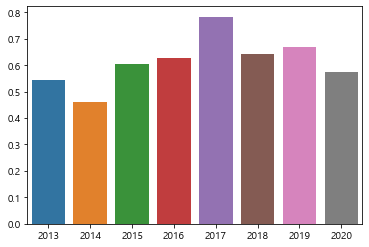

In [592]:
sns.barplot(data = pd.DataFrame(부입dict,index=['corr']))

    2)정시기준 연관성 비교

In [593]:
부입dict={}   # key = 연도 / values = corr값
for i in range(2013,2021) :
    부입dict[i] = pd.merge(df[['자치구',str(i)+'매매가']],df1[['자치구',str(i)+'(정시)']],on='자치구',how='outer').corr().iloc[0,1]

In [594]:
np.mean(list(부입dict.values()))

0.7863664039536427

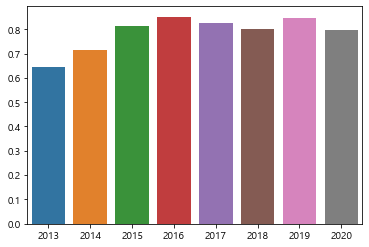

In [595]:
sns.barplot(data = pd.DataFrame(부입dict,index=['corr']))

    3)수시기준 연관성 비교

In [597]:
부입dict={}   # key = 연도 / values = corr값
for i in range(2013,2021) :
    부입dict[i] = pd.merge(df[['자치구',str(i)+'매매가']],df1[['자치구',str(i)+'(수시)']],on='자치구',how='outer').corr().iloc[0,1]

In [598]:
np.mean(list(부입dict.values()))

0.32428044650742904

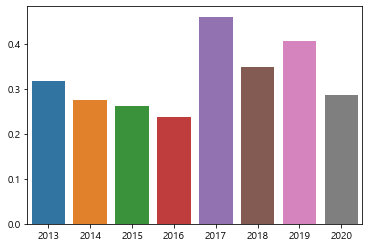

In [599]:
sns.barplot(data = pd.DataFrame(부입dict,index=['corr']))

### 입시자 & 학원 연관성 비교
    1) 수시+정시

In [521]:
학입dict={}   # key = 연도 / values = corr값
for i in range(2013,2019) :
    학입dict[i] = pd.merge(df[['자치구',str(i)+'사업체수']],df1[['자치구',str(i)+'(총합)']],on='자치구',how='outer').corr().iloc[0,1]

In [523]:
np.mean(list(학입dict.values()))

0.5470849715412148

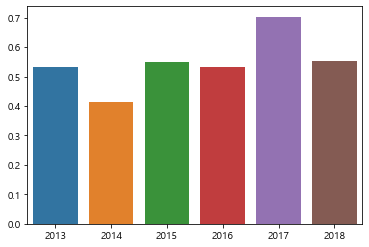

In [522]:
sns.barplot(data = pd.DataFrame(학입dict,index=['corr']))

    2) 정시기준

In [600]:
학입dict={}   # key = 연도 / values = corr값
for i in range(2013,2019) :
    학입dict[i] = pd.merge(df[['자치구',str(i)+'사업체수']],df1[['자치구',str(i)+'(정시)']],on='자치구',how='outer').corr().iloc[0,1]

In [601]:
np.mean(list(학입dict.values()))

0.6239322940408426

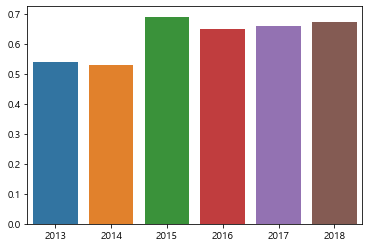

In [602]:
sns.barplot(data = pd.DataFrame(학입dict,index=['corr']))

    2) 수시기준

In [603]:
학입dict={}   # key = 연도 / values = corr값
for i in range(2013,2019) :
    학입dict[i] = pd.merge(df[['자치구',str(i)+'사업체수']],df1[['자치구',str(i)+'(수시)']],on='자치구',how='outer').corr().iloc[0,1]

In [604]:
np.mean(list(학입dict.values()))

0.333938159556294

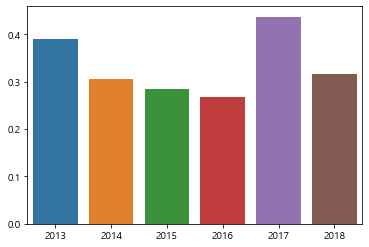

In [605]:
sns.barplot(data = pd.DataFrame(학입dict,index=['corr']))

### 학원 연관성 & 부동산 비교

In [521]:
학입dict={}   # key = 연도 / values = corr값
for i in range(2013,2019) :
    학입dict[i] = pd.merge(df[['자치구',str(i)+'사업체수']],df1[['자치구',str(i)+'(총합)']],on='자치구',how='outer').corr().iloc[0,1]

In [523]:
np.mean(list(학입dict.values()))

0.5470849715412148

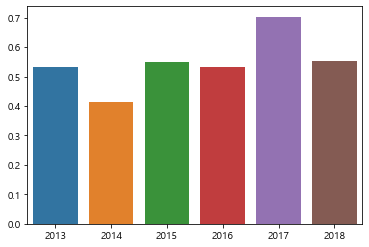

In [522]:
sns.barplot(data = pd.DataFrame(학입dict,index=['corr']))

### 월별 부동산가 비교

In [51]:
학부dict={}
for i in range(2013,2019):
    학부dict[i] = df[[str(i)+'사업체수',str(i)+'매매가']].corr().iloc[0,1]

In [524]:
np.mean(list(학부dict.values()))

0.6037950590931674

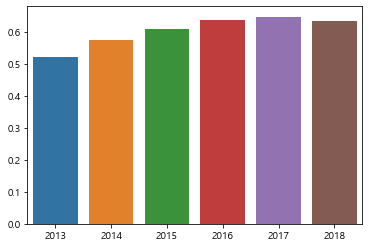

In [526]:
sns.barplot(data = pd.DataFrame(학부dict,index=['corr']))

#### 부동산 & 학원수

In [643]:
mon(12).loc[:,['2013사업체수','2013매매가']].corr().iloc[0,1]

0.5459317073267694

In [706]:
mon(1).loc[:,['2017사업체수', '2017매매가']]

,2017사업체수,2017매매가
0,852,513023
1,454,554130
2,539,813773
3,886,503218
4,1159,668409
5,985,398415
6,922,315100
7,1372,407439
8,683,346422
9,960,313396


In [710]:
월별dict= {}
for i in range(1,13):
    임시 = []
    for j in range(2013,2019):
        
        임시.append(mon(i).loc[:,[str(j)+'사업체수',str(j)+'매매가']].corr().iloc[0,1])
        
    월별dict[i] =  np.mean(임시)   

In [653]:
월별dict= {}
for i in range(1,13):
    임시 = []
    for j in range(2013,2019):
        try :
            mon(i).loc[:,[str(j)+'사업체수', str(j)+'매매가']]
        except :
            print(i,j)
#     월별dict[i] =  np.mean(임시)   

1 2013
1 2014
1 2015
1 2016
1 2017
1 2018
2 2013
2 2014
2 2015
2 2016
2 2017
2 2018
3 2013
3 2014
3 2015
3 2016
3 2017
3 2018
4 2013
4 2014
4 2015
4 2016
4 2017
4 2018
5 2013
5 2014
5 2015
5 2016
5 2017
5 2018
6 2013
6 2014
6 2015
6 2016
6 2017
6 2018
7 2013
7 2014
7 2015
7 2016
7 2017
7 2018
8 2013
8 2014
8 2015
8 2016
8 2017
8 2018
9 2013
9 2014
9 2015
9 2016
9 2017
9 2018
10 2013
10 2014
10 2015
10 2016
10 2017
10 2018


In [748]:
max(월별dict.values())   # 10, 11월이 가장 연관성이 높음

0.6185927906974733

In [756]:
np.mean(list(월별dict.values()))

0.6110567506552241

Text(0.5, 0, '월별')

<Figure size 288x216 with 0 Axes>

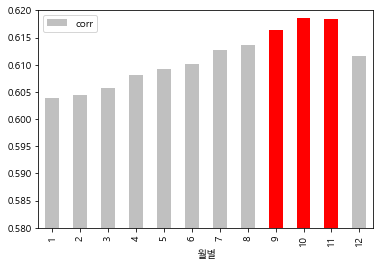

In [747]:
plt.figure(figsize = (4,3))
colors = ['silver','silver','silver','silver', 'silver', 'silver', 'silver', 'silver','Red','Red','Red','silver']

pd.DataFrame(월별dict,index=['corr']).T.plot.bar(y='corr' , color = colors)
plt.ylim([0.58, 0.62])

plt.xlabel('월별')

#### 부동산 & 입학학생수

In [711]:
mon(1).head(1)

,자치구,2013사업체수,2013종사자수,2014사업체수,2014종사자수,2015사업체수,2015종사자수,2016사업체수,2016종사자수,2017사업체수,2017종사자수,2018사업체수,2018종사자수,2013매매가,2014매매가,2015매매가,2016매매가,2017매매가,2018매매가,2019매매가
0,종로구,866,12325,885,12303,876,13646,880,13130,852,13317,850,13504,499805,479337,481884,504337,513023,602125,710411


In [716]:
mon(1).iloc[:,[0,-8,-7,-6,-5,-4,-3,-2,-1]]   # 자치구 / 1월부동산가격

,자치구,2018종사자수,2013매매가,2014매매가,2015매매가,2016매매가,2017매매가,2018매매가,2019매매가
0,종로구,13504,499805,479337,481884,504337,513023,602125,710411
1,중구,8321,493920,502759,509648,545037,554130,623017,775667
2,용산구,7452,807000,761439,750030,791288,813773,1080385,1378500
3,성동구,11371,439910,447987,456859,492987,503218,680771,881926
4,광진구,14139,630606,600879,608515,654955,668409,765921,902974
5,동대문구,16243,356423,349817,354500,389744,398415,447890,593904
6,중랑구,7773,300176,296329,297434,312566,315100,353115,444432
7,성북구,21481,369468,362592,365092,395602,407439,447027,558217
8,강북구,5871,323917,318317,321167,346317,346422,385643,478758
9,도봉구,7537,291208,285635,289167,307792,313396,350782,431198


In [717]:
인 = []
for i in range(2013,2021):
    인.append(str(i)+'(정시)')
인.append('자치구')

In [718]:
df1.loc[:,인]

,2013(정시),2014(정시),2015(정시),2016(정시),2017(정시),2018(정시),2019(정시),2020(정시),자치구
"시,구",,,,,,,,,
종로구,5.0,5.0,8.0,10.0,17.0,8.0,11.0,3.0,종로구
중구,4.0,7.0,10.0,15.0,29.0,20.0,18.0,11.0,중구
용산구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,용산구
성동구,3.0,3.0,3.0,3.0,4.0,2.0,4.0,1.0,성동구
광진구,44.0,32.0,31.0,30.0,13.0,14.0,20.0,23.0,광진구
동대문구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,동대문구
중랑구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,중랑구
성북구,10.0,8.0,4.0,6.0,4.0,1.0,1.0,1.0,성북구
강북구,2.0,3.0,2.0,0.0,2.0,5.0,5.0,3.0,강북구


In [719]:
판총 = pd.merge(mon(1).iloc[:,[0,-8,-7,-6,-5,-4,-3,-2,-1]],df1.loc[:,인],on='자치구',how = 'outer')
판총

,자치구,2018종사자수,2013매매가,2014매매가,2015매매가,2016매매가,2017매매가,2018매매가,2019매매가,2013(정시),2014(정시),2015(정시),2016(정시),2017(정시),2018(정시),2019(정시),2020(정시)
0,종로구,13504,499805,479337,481884,504337,513023,602125,710411,5.0,5.0,8.0,10.0,17.0,8.0,11.0,3.0
1,중구,8321,493920,502759,509648,545037,554130,623017,775667,4.0,7.0,10.0,15.0,29.0,20.0,18.0,11.0
2,용산구,7452,807000,761439,750030,791288,813773,1080385,1378500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,성동구,11371,439910,447987,456859,492987,503218,680771,881926,3.0,3.0,3.0,3.0,4.0,2.0,4.0,1.0
4,광진구,14139,630606,600879,608515,654955,668409,765921,902974,44.0,32.0,31.0,30.0,13.0,14.0,20.0,23.0
5,동대문구,16243,356423,349817,354500,389744,398415,447890,593904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,중랑구,7773,300176,296329,297434,312566,315100,353115,444432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,성북구,21481,369468,362592,365092,395602,407439,447027,558217,10.0,8.0,4.0,6.0,4.0,1.0,1.0,1.0
8,강북구,5871,323917,318317,321167,346317,346422,385643,478758,2.0,3.0,2.0,0.0,2.0,5.0,5.0,3.0
9,도봉구,7537,291208,285635,289167,307792,313396,350782,431198,2.0,5.0,8.0,10.0,11.0,9.0,9.0,9.0


In [741]:
월별1dict = {}
for j in range(1,13):
    임시 = []
    판총 = pd.merge(mon(j).iloc[:,[0,-8,-7,-6,-5,-4,-3,-2,-1]],df1.loc[:,인],on='자치구',how = 'outer')
    for i in range(2013,2020):
        임시.append(판총.loc[:,[str(i)+'매매가',str(i)+'(정시)']].corr().iloc[0,1])
    월별1dict[j] = np.mean(임시)
#     print(임시)

In [757]:
np.mean(list(월별1dict.values()))  # 1월의 매매가가 가장 큰영향  #  7,8,9,11

0.7849597196409729

Text(0.5, 0, '월별')

<Figure size 288x216 with 0 Axes>

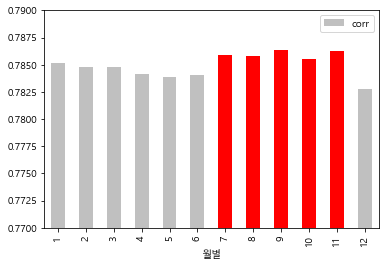

In [746]:
plt.figure(figsize = (4,3))
colors = ['silver','silver','silver','silver', 'silver', 'silver', 'Red', 'Red','Red','Red' ,'Red','silver']

pd.DataFrame(월별1dict,index=['corr']).T.plot.bar(y='corr' , color = colors)
plt.ylim([0.77, 0.79])

plt.xlabel('월별')

### 서울시 기준
    <세부기준>
    입시 : 정시
    부동산 : 10월

In [762]:
df = mon(10).copy()  # 학원수, 매매가

In [769]:
정시 = df1.iloc[:,[1,4,7,10,13,16,19,22]]

In [802]:
정시1 = pd.DataFrame(정시.sum())
정시1.columns =['정시']
정시1.index = [2020,2019,2018,2017,2016,2015,2014,2013]
정시1 = 정시1.reindex([2013,2014,2015,2016,2017,2018,2019,2020])
정시1

,정시
2013,201.0
2014,170.0
2015,234.0
2016,243.0
2017,267.0
2018,213.0
2019,202.0
2020,191.0


In [777]:
학원 = df.iloc[:,[1,3,5,7,9,11]]

In [804]:
학원1 = pd.DataFrame(학원.sum())
학원1.columns = ['학원수']
학원1.index = [2013,2014,2015,2016,2017,2018]
학원1

,학원수
2013,32240
2014,33288
2015,33612
2016,34065
2017,34762
2018,35377


In [781]:
매매가 = df.iloc[:,[13,14,15,16,17,18,19]]

In [808]:
매매가1 = pd.DataFrame(매매가.mean())
매매가1.columns = ['매매가']
매매가1.index = [2013,2014,2015,2016,2017,2018,2019]
매매가1

,매매가
2013,464412.76
2014,470580.84
2015,508294.24
2016,523113.96
2017,545145.88
2018,670627.56
2019,758375.40


In [816]:
분석 = pd.concat([정시1,학원1,매매가1],axis =1).dropna()
분석

,정시,학원수,매매가
2013,201.0,32240.0,464412.76
2014,170.0,33288.0,470580.84
2015,234.0,33612.0,508294.24
2016,243.0,34065.0,523113.96
2017,267.0,34762.0,545145.88
2018,213.0,35377.0,670627.56


In [819]:
분석['정시율'] = 분석['정시'] / np.mean(분석['정시'])
분석['학원율'] = 분석['학원수'] / np.mean(분석['학원수'])
분석['매매가율'] = 분석['매매가'] / np.mean(분석['매매가'])

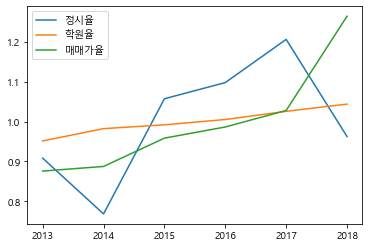

In [822]:
분석.iloc[:,3:].plot()

#  구별 분석
    ['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구',
       '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구',
       '관악구', '서초구', '강남구', '송파구', '강동구']

In [577]:
구list = list(df.자치구)   # 서울시 구 전체
len(구list)

25

In [759]:
# 필요 : 입시값이 있는 지역
필요 = ['강남구', '강동구', '강서구', '광진구', '구로구', '노원구', '도봉구', '서초구', '성동구', '성북구',
       '송파구', '양천구', '은평구', '종로구', '중구', '강북구']
len(필요)

16

In [615]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 종로구 to 강동구
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   2020(총합)  17 non-null     float64
 1   2020(정시)  17 non-null     float64
 2   2020(수시)  17 non-null     float64
 3   2019(총합)  17 non-null     float64
 4   2019(정시)  17 non-null     float64
 5   2019(수시)  17 non-null     float64
 6   2018(총합)  17 non-null     float64
 7   2018(정시)  17 non-null     float64
 8   2018(수시)  17 non-null     float64
 9   2017(총합)  17 non-null     float64
 10  2017(정시)  17 non-null     float64
 11  2017(수시)  17 non-null     float64
 12  2016(총합)  17 non-null     float64
 13  2016(정시)  17 non-null     float64
 14  2016(수시)  17 non-null     float64
 15  2015(총합)  17 non-null     float64
 16  2015(정시)  17 non-null     float64
 17  2015(수시)  17 non-null     float64
 18  2014(총합)  17 non-null     float64
 19  2014(정시)  17 non-null     float64
 20  2014(수시)  17 non-null     float64
 2

### 입시자 & 부동산가격 비교

In [73]:
list(df.자치구)

['종로구',
 '중구',
 '용산구',
 '성동구',
 '광진구',
 '동대문구',
 '중랑구',
 '성북구',
 '강북구',
 '도봉구',
 '노원구',
 '은평구',
 '서대문구',
 '마포구',
 '양천구',
 '강서구',
 '구로구',
 '금천구',
 '영등포구',
 '동작구',
 '관악구',
 '서초구',
 '강남구',
 '송파구',
 '강동구']

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   자치구       25 non-null     object
 1   2013사업체수  25 non-null     int64 
 2   2013종사자수  25 non-null     int64 
 3   2014사업체수  25 non-null     int64 
 4   2014종사자수  25 non-null     int64 
 5   2015사업체수  25 non-null     int64 
 6   2015종사자수  25 non-null     int64 
 7   2016사업체수  25 non-null     int64 
 8   2016종사자수  25 non-null     int64 
 9   2017사업체수  25 non-null     int64 
 10  2017종사자수  25 non-null     int64 
 11  2018사업체수  25 non-null     int64 
 12  2018종사자수  25 non-null     int64 
 13  2013매매가   25 non-null     int64 
 14  2014매매가   25 non-null     int64 
 15  2015매매가   25 non-null     int64 
 16  2016매매가   25 non-null     int64 
 17  2017매매가   25 non-null     int64 
 18  2018매매가   25 non-null     int64 
 19  2019매매가   25 non-null     int64 
 20  2020매매가   25 non-null     int64 
dtypes: int64(20), obje

#### 구별 연도별 사업체수

In [67]:
pd.DataFrame(df.iloc[0,[1,3,5,7,9,11]])  # 연도별 사업체수 index, col변경필요

,0
2013사업체수,866
2014사업체수,885
2015사업체수,876
2016사업체수,880
2017사업체수,852
2018사업체수,850


In [190]:
임시dict = {}   # 
for i in range(25):
    임시dict[구list[i]] =  pd.DataFrame(df.iloc[0,[1,3,5,7,9,11]])
    임시dict[구list[i]].index = [2013,2014,2015,2016,2017,2018]
    임시dict[구list[i]].columns = ['사업체수']

In [191]:
임시dict['종로구']  # 임시dict  row :연도, index는 사업체수

,사업체수
2013,866
2014,885
2015,876
2016,880
2017,852
2018,850


In [192]:
df[['2013매매가', '2014매매가', '2015매매가', '2016매매가', '2017매매가',
       '2018매매가', '2019매매가', '2020매매가']].iloc[0]

2013매매가     499805
2014매매가     479337
2015매매가     481884
2016매매가     504337
2017매매가     513023
2018매매가     602125
2019매매가     710411
2020매매가    1022319
Name: 0, dtype: int64

In [193]:
임시dict1 = {}
for i in range(25):

    
    임시dict1[구list[i]] =  pd.DataFrame(df[['2013매매가', '2014매매가', '2015매매가', '2016매매가', '2017매매가',
       '2018매매가', '2019매매가', '2020매매가']].iloc[0])
    임시dict1[구list[i]].index = [2013,2014,2015,2016,2017,2018,2019,2020]
    임시dict1[구list[i]].columns = ['매매가']

In [194]:
임시dict1['종로구']   # 임시dict1  연도  /  매매가

,매매가
2013,499805
2014,479337
2015,481884
2016,504337
2017,513023
2018,602125
2019,710411
2020,1022319


In [195]:
df1 = df1.reindex(구list)

In [196]:
df1

,2020(총합),2020(정시),2020(수시),2019(총합),2019(정시),2019(수시),2018(총합),2018(정시),2018(수시),2017(총합),...,2015(총합),2015(정시),2015(수시),2014(총합),2014(정시),2014(수시),2013(총합),2013(정시),2013(수시),자치구
"시,구",,,,,,,,,,,,,,,,,,,,,
종로구,18.0,3.0,15.0,23.0,11.0,12.0,20.0,8.0,12.0,19.0,...,14.0,8.0,6.0,10.0,5.0,5.0,13.0,5.0,8.0,종로구
중구,84.0,11.0,73.0,74.0,18.0,56.0,67.0,20.0,47.0,32.0,...,44.0,10.0,34.0,41.0,7.0,34.0,39.0,4.0,35.0,중구
용산구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,용산구
성동구,7.0,1.0,6.0,5.0,4.0,1.0,6.0,2.0,4.0,3.0,...,8.0,3.0,5.0,9.0,3.0,6.0,12.0,3.0,9.0,성동구
광진구,58.0,23.0,35.0,53.0,20.0,33.0,50.0,14.0,36.0,55.0,...,79.0,31.0,48.0,95.0,32.0,63.0,83.0,44.0,39.0,광진구
동대문구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,동대문구
중랑구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,중랑구
성북구,27.0,1.0,26.0,23.0,1.0,22.0,17.0,1.0,16.0,31.0,...,32.0,4.0,28.0,35.0,8.0,27.0,41.0,10.0,31.0,성북구
강북구,8.0,3.0,5.0,11.0,5.0,6.0,10.0,5.0,5.0,3.0,...,4.0,2.0,2.0,7.0,3.0,4.0,4.0,2.0,2.0,강북구


In [197]:
l = []
for i in range(2013,2021):
    l.append(str(i)+'(총합)')

In [198]:
l

['2013(총합)',
 '2014(총합)',
 '2015(총합)',
 '2016(총합)',
 '2017(총합)',
 '2018(총합)',
 '2019(총합)',
 '2020(총합)']

In [199]:
df1[l].iloc[0]

2013(총합)    13.0
2014(총합)    10.0
2015(총합)    14.0
2016(총합)    15.0
2017(총합)    19.0
2018(총합)    20.0
2019(총합)    23.0
2020(총합)    18.0
Name: 종로구, dtype: float64

In [200]:
임시dict2 = {}
for i in range(25):

    
    임시dict2[구list[i]] =  pd.DataFrame(df1[l].iloc[i])
    임시dict2[구list[i]].index = [2013,2014,2015,2016,2017,2018,2019,2020]
    임시dict2[구list[i]].columns = ['입시생']

In [201]:
임시dict2  # 년도 / 입시생(총합기준)

{'종로구':        입시생
 2013  13.0
 2014  10.0
 2015  14.0
 2016  15.0
 2017  19.0
 2018  20.0
 2019  23.0
 2020  18.0,
 '중구':        입시생
 2013  39.0
 2014  41.0
 2015  44.0
 2016  54.0
 2017  32.0
 2018  67.0
 2019  74.0
 2020  84.0,
 '용산구':       입시생
 2013  NaN
 2014  NaN
 2015  NaN
 2016  NaN
 2017  NaN
 2018  NaN
 2019  NaN
 2020  NaN,
 '성동구':        입시생
 2013  12.0
 2014   9.0
 2015   8.0
 2016  10.0
 2017   3.0
 2018   6.0
 2019   5.0
 2020   7.0,
 '광진구':        입시생
 2013  83.0
 2014  95.0
 2015  79.0
 2016  71.0
 2017  55.0
 2018  50.0
 2019  53.0
 2020  58.0,
 '동대문구':       입시생
 2013  NaN
 2014  NaN
 2015  NaN
 2016  NaN
 2017  NaN
 2018  NaN
 2019  NaN
 2020  NaN,
 '중랑구':       입시생
 2013  NaN
 2014  NaN
 2015  NaN
 2016  NaN
 2017  NaN
 2018  NaN
 2019  NaN
 2020  NaN,
 '성북구':        입시생
 2013  41.0
 2014  35.0
 2015  32.0
 2016  34.0
 2017  31.0
 2018  17.0
 2019  23.0
 2020  27.0,
 '강북구':        입시생
 2013   4.0
 2014   7.0
 2015   4.0
 2016   3.0
 2017   3.0
 2018  10.0
 2019  1

In [202]:
구별dict = {}
for i in range(25):
    구별dict[구list[i]] = pd.concat([임시dict[구list[i]],임시dict1[구list[i]],임시dict2[구list[i]]],axis=1)

In [203]:
구별dict['강남구']

,사업체수,매매가,입시생
2013,866,499805,78.0
2014,885,479337,71.0
2015,876,481884,75.0
2016,880,504337,73.0
2017,852,513023,87.0
2018,850,602125,94.0
2019,NaN,710411,97.0
2020,NaN,1022319,91.0


### 구별 분석(2) 11.10
    상승 : 강남, 서초
    하락 : 광진, 강서
    유지 : 은평, 송파

In [434]:
필요 = ['강남구', '강동구', '강서구', '광진구', '구로구', '노원구', '도봉구', '서초구', '성동구', '성북구',
       '송파구', '양천구', '은평구', '종로구', '중구', '강북구']

In [435]:
# 필요지역 년도별 평균가
nam = df[df['자치구'].isin(필요)]
nam

,자치구,2013사업체수,2013종사자수,2014사업체수,2014종사자수,2015사업체수,2015종사자수,2016사업체수,2016종사자수,2017사업체수,...,2018사업체수,2018종사자수,2013매매가,2014매매가,2015매매가,2016매매가,2017매매가,2018매매가,2019매매가,2020매매가
0,종로구,866,12325,885,12303,876,13646,880,13130,852,...,850,13504,499805,479337,481884,504337,513023,602125,710411,1022319
1,중구,510,7644,516,8270,508,9983,481,8849,454,...,471,8321,493920,502759,509648,545037,554130,623017,775667,795743
3,성동구,745,10030,760,9885,785,11076,810,10837,886,...,961,11371,439910,447987,456859,492987,503218,680771,881926,899118
4,광진구,1132,12597,1114,12507,1100,13897,1136,13848,1159,...,1183,14139,630606,600879,608515,654955,668409,765921,902974,1014402
7,성북구,1304,22343,1304,21230,1302,23211,1337,20637,1372,...,1382,21481,369468,362592,365092,395602,407439,447027,558217,589518
8,강북구,701,5886,709,5813,662,5694,685,5676,683,...,684,5871,323917,318317,321167,346317,346422,385643,478758,495000
9,도봉구,975,7358,958,7279,942,7560,931,7257,960,...,962,7537,291208,285635,289167,307792,313396,350782,431198,420883
10,노원구,1810,19966,1835,20437,1880,20976,1903,20447,1951,...,1950,21138,268514,266056,272873,301725,308690,362431,445903,467222
11,은평구,1402,9994,1433,10178,1415,10669,1405,9874,1430,...,1469,10058,346473,351538,356125,376600,387513,438344,537430,601337
14,양천구,2215,13971,2245,14467,2285,15066,2280,14521,2366,...,2376,14974,532578,524647,535971,586667,611853,705708,808806,876286


In [436]:
서울평균 = pd.DataFrame(nam.iloc[:,[1,3,5,7,9,11,12,13,14,15,16,17,18,19,20]].mean())
서울평균

,0
2013사업체수,1456.1250
2014사업체수,1503.0625
2015사업체수,1525.5625
2016사업체수,1544.8125
2017사업체수,1578.8125
2018사업체수,1602.8750
2018종사자수,14589.8125
2013매매가,491455.6875
2014매매가,486740.4375
2015매매가,494898.1875


In [437]:
임시입시 = df1.copy()
임시입시 = 임시입시.reindex(필요)
pd.DataFrame(임시입시.iloc[:,[0,3,6,9,12,15,18]].mean())

,0
2020(총합),41.0625
2019(총합),38.5000
2018(총합),38.0000
2017(총합),35.1250
2016(총합),39.8750
2015(총합),39.7500
2014(총합),39.5625


In [438]:
서울 = pd.concat([서울평균,pd.DataFrame(임시입시.iloc[:,[0,3,6,9,12,15,18,21]].mean())])
서울 = 서울.reindex(['2013사업체수', '2014사업체수', '2015사업체수', '2016사업체수', '2017사업체수', '2018사업체수',
       '2013매매가', '2014매매가', '2015매매가', '2016매매가', '2017매매가',
       '2018매매가', '2019매매가', '2020매매가', '2020(총합)', '2019(총합)', '2018(총합)',
       '2017(총합)', '2016(총합)', '2015(총합)', '2014(총합)','2013(총합)'])

In [439]:
비율dict = {}
for i in 필요 :
    비율dict[i] = 구별dict[i].copy()
    l = []
    for j in range(6):
        l.append(비율dict[i].iloc[j,0] / 서울.iloc[j,0])
    l.append(np.nan)
    l.append(np.nan)

    lll=[]
    for j in range(8):

        lll.append(비율dict[i].iloc[j,2] / 서울.iloc[-1-j,0])

    ll = []
    for j in range(8):
        ll.append(비율dict[i].iloc[j,1] / 서울.iloc[j+6,0])
    
    비율dict[i]['사업체비율'] = l             
    비율dict[i]['매매비율'] = ll
    비율dict[i]['입시생비율'] = lll

C:\Users\olooo\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
<ipython-input-440-3769289c2a69>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(3,2))
C:\Users\olooo\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume to

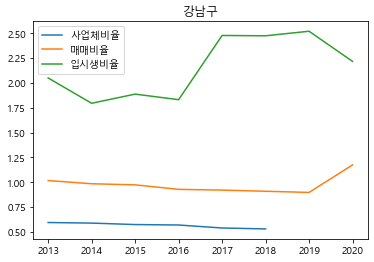

<Figure size 216x144 with 0 Axes>

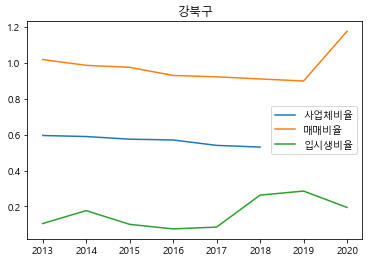

<Figure size 216x144 with 0 Axes>

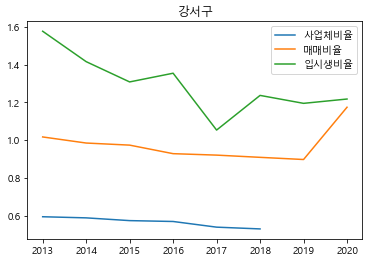

<Figure size 216x144 with 0 Axes>

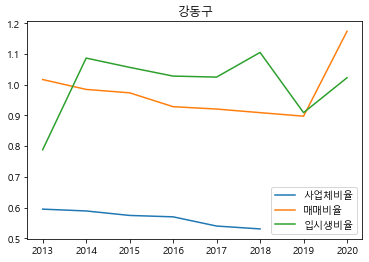

<Figure size 216x144 with 0 Axes>

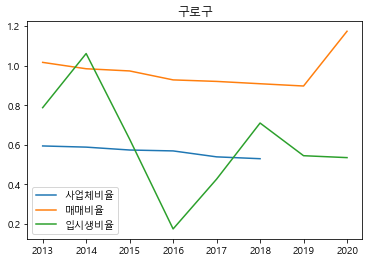

<Figure size 216x144 with 0 Axes>

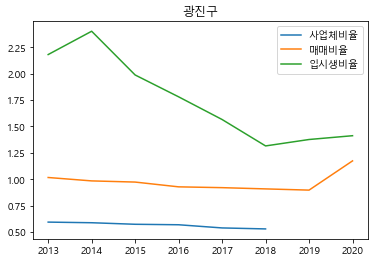

<Figure size 216x144 with 0 Axes>

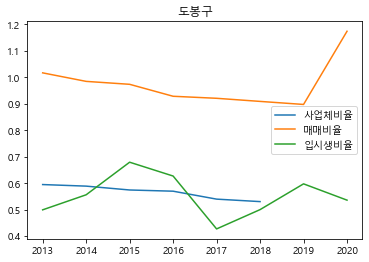

<Figure size 216x144 with 0 Axes>

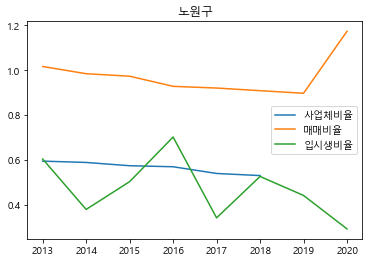

<Figure size 216x144 with 0 Axes>

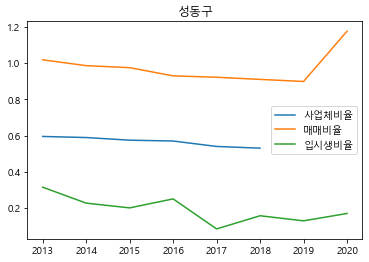

<Figure size 216x144 with 0 Axes>

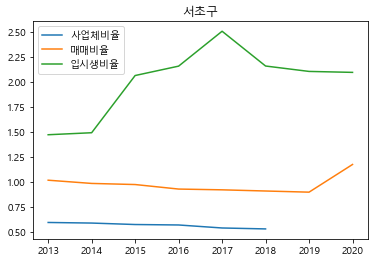

<Figure size 216x144 with 0 Axes>

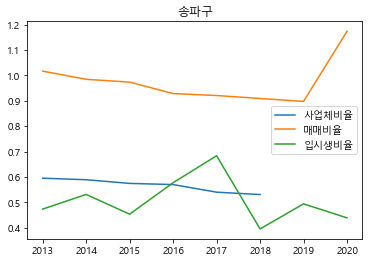

<Figure size 216x144 with 0 Axes>

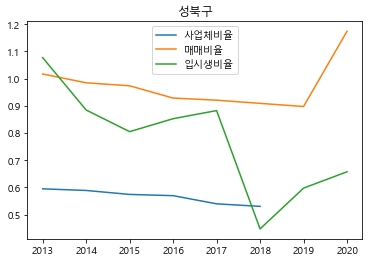

<Figure size 216x144 with 0 Axes>

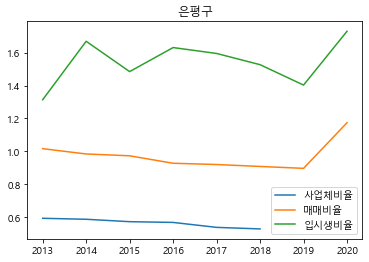

<Figure size 216x144 with 0 Axes>

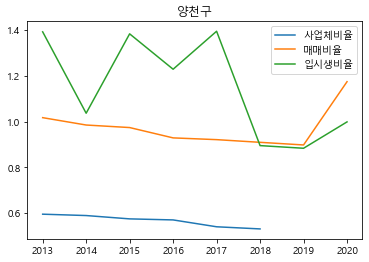

<Figure size 216x144 with 0 Axes>

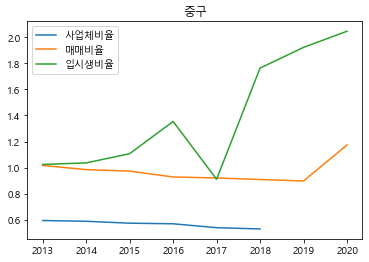

<Figure size 216x144 with 0 Axes>

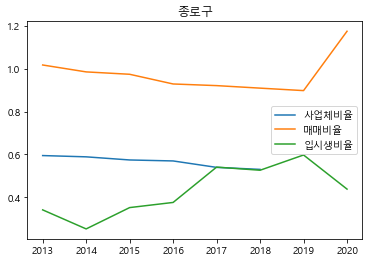

<Figure size 216x144 with 0 Axes>

In [440]:
for i in range(8):
    비율dict[필요[2*i]].iloc[:,[3,4,5]].plot()
    plt.title(필요[2*i])
    plt.figure(figsize=(3,2))
    
    비율dict[필요[2*i-1]].iloc[:,[3,4,5]].plot()
    plt.title(필요[2*i-1])
    plt.figure(figsize=(3,2))
    


In [431]:
from sklearn.preprocessing import StandardScaler
def norm(x):
    _max = x.max()
    _min = x.min()
    _denom = _max - _min
    return (x - _min) / _denom

In [441]:
비율dict['강남구']['사업체수'].apply(norm)

AttributeError: 'float' object has no attribute 'max'

In [442]:
비율dict['강남구']

,사업체수,매매가,입시생,사업체비율,매매비율,입시생비율
2013,866,499805,78.0,0.594729,1.016989,2.049261
2014,885,479337,71.0,0.588798,0.984790,1.794629
2015,876,481884,75.0,0.574214,0.973703,1.886792
2016,880,504337,73.0,0.569648,0.928489,1.830721
2017,852,513023,87.0,0.539646,0.920832,2.476868
2018,850,602125,94.0,0.530297,0.909085,2.473684
2019,NaN,710411,97.0,NaN,0.897580,2.519481
2020,NaN,1022319,91.0,NaN,1.174309,2.216134


In [302]:
df = mon(1).copy()
df.head(1)
df[['자치구','2020매매가']]

,자치구,2020매매가
0,종로구,1022319
1,중구,795743
2,용산구,1389939
3,성동구,899118
4,광진구,1014402
5,동대문구,652774
6,중랑구,451372
7,성북구,589518
8,강북구,495000
9,도봉구,420883


In [218]:
서울평균 = {}
for i in range(2013, 2021) :
    서울평균[i] = df.loc[:,str(i)+'매매가'].mean()

In [222]:
서울평균[2013]

470560.0

In [223]:
df.loc[:,'2013매매가'].mean()

470560.0

In [225]:
강남 = 구별dict['강남구'].copy()

In [240]:
강남

,사업체수,매매가,입시생
2013,866,499805,78.0
2014,885,479337,71.0
2015,876,481884,75.0
2016,880,504337,73.0
2017,852,513023,87.0
2018,850,602125,94.0
2019,NaN,710411,97.0
2020,NaN,1022319,91.0


In [233]:
서울평균.values()

dict_values([470560.0, 465280.32, 471926.12, 512721.44, 526151.36, 625043.04, 760679.08, 828988.36])

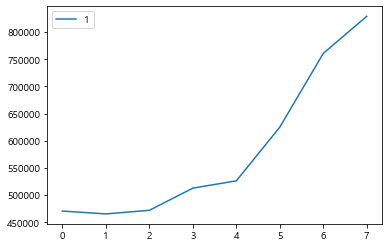

In [277]:
pd.DataFrame(서울).T.plot()

In [250]:
ll = []
for i in range(8):
     ll.append(강남.iloc[i,1] / pd.DataFrame(서울).T.iloc[i,1])

In [252]:
강남['매매비율'] = ll

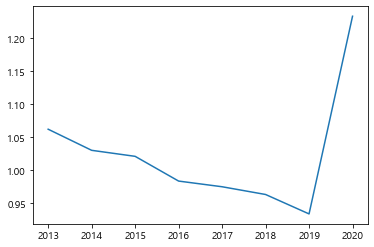

In [254]:
강남.매매비율.plot()

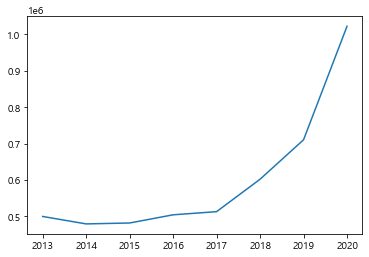

In [257]:
구별dict['강남구']['매매가'].plot()